# **DATA ANALYSIS PROJECT ON RETAIL SALES**

#### This project entails Data analytic and Data Visualization using Python programming language and it libraries

#### Perfromed by: Adeyemi Oluwaseyi Emmanuel
- [Linkedin](https://www.linkedin.com/in/oluwaseyi-adeyemi-33b1ab197/)
- [Github](https://github.com/legendseyi)
- [Twitter](https://twitter.com/AmLegendseyi)

## _IMPORTING PYTHON LIBRARIES_

In this section, we will be importing python libraries that serves as the tools required for our analytic project. 

The libraries we will be importing are:
- **Pandas:** This is used for transforming/ representing the data format into a readable dataframe for cleaning, analysing, and exploring the data..
- **Numpy:** This is used for transforming/ representing the data format into series, for cleaning, analysing, and exploring the data..
- **Matplotlib.pyplot:** This is a module under the matplotlib library. it is used for visualizing the cleaned data
- **Seaborn:** This library is also ued fot visualization 

In [312]:
## Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## _INTRODUCTION_

In this section, we will be importing the dataset which is in a csv format **(Comma-Separated Values)**

### NOTE: IMPORTANT INSIGHTS ARE REPRESENTED IN BOLD TEXTS 

The dataset contains information about a retail sales transaction which was sourced from Kaggle.com. The dataset contains 1000 rows and 9 columns. Each row represents a transaction, with details:
1.	Transaction ID: Each transaction has a distinct identification number that enables tracking and referencing.
2.	Date: The date when the transaction occurred, providing insight into sales trends over time.
3.	Customer ID: Each customer is assigned a unique identifier which allows for in-depth analysis focused on the customer.
4.	Gender: Customer gender (male/female) provides insights into purchasing patterns based on gender. 
5.	Age: Age of the customer plays a crucial role in segmenting and exploring age-related influence.
6.	Product Category: The product category (Electronics, Clothing, and Beauty) helps identify product preferences.
7.	Quantity: The number of units of the product purchased, contributing to insights on purchase volumes.
8.	Price per Unit (£): The price of one unit of the product, aiding in calculations related to total spending.
9.	Total Amount (£): The total amount of money spent on the transaction, including the financial impact of each purchase.


In [313]:
data = pd.read_csv('retail_sales_dataset.csv')

The dataset has been imported and stored to a variable. so it ready for further exploration.

In [314]:
data.shape

(1000, 9)

**This dataset has 1000 rows and 9 columns**

In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


**Checking the data overall information, these are the observations:**
- **There are no null values; this means that there are no missing values and the data is clean**
- **Five of the columns are int64(5) data type; meaning that the columns contains number values**
- **Four of the columns are Object data type; meaning that the columns contains letters**




Overview of the first 5 rolls of the dataset

In [316]:
data.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [317]:
data.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

**These are the list of columns available in the data:**
- transaction id
- date
- customer id
- gender
- age
- product category
- quantity
- price per unit
- total amount

_From Observation, according to python standard code format, i will rename the columns, by fill the empty space ( " "  with "_") 

In [318]:
# renaming the data columns
new_colnames = []
for col in data.columns:
    new_colnames.append(col.replace(' ', '_').lower())
data.columns = new_colnames

In [319]:
# Checking if the changes are applied
data

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


**Although not included in the corresponding column names, the currency of these data is GBP (£).**

Checking  data types (dtypes)

In [320]:
data.dtypes

transaction_id       int64
date                object
customer_id         object
gender              object
age                  int64
product_category    object
quantity             int64
price_per_unit       int64
total_amount         int64
dtype: object

**I will make the following changes to some column dtypes:**  
- date to **`datetime`**
- gender and product_category to **`category`**

In [321]:
data.date = pd.to_datetime(data.date)

In [322]:
data.gender = data.gender.astype('category')
data.product_category = data.product_category.astype('category')

Checking if the data types changes has been applied

In [323]:
data.dtypes

transaction_id               int64
date                datetime64[ns]
customer_id                 object
gender                    category
age                          int64
product_category          category
quantity                     int64
price_per_unit               int64
total_amount                 int64
dtype: object

## DATA CLEANING AND PRELIMINAR EDA 

In this section, we will start by analying the data column by column

In [324]:
data.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


### TRANSACTION ID COLUMN

In [325]:
data['transaction_id'].value_counts().sum()

1000

**From the Above, there are 1000 rolls and 1000 unique value of number in the transaction_id column**

The column mainly represent the identity of each unqiue transaction preformed

### DATE COLUMN

In [326]:
# Checking the date column information
data['date']

0     2023-11-24
1     2023-02-27
2     2023-01-13
3     2023-05-21
4     2023-05-06
         ...    
995   2023-05-16
996   2023-11-17
997   2023-10-29
998   2023-12-05
999   2023-04-12
Name: date, Length: 1000, dtype: datetime64[ns]

In [327]:
min(data.date), max(data.date)

(Timestamp('2023-01-01 00:00:00'), Timestamp('2024-01-01 00:00:00'))

**What are the earliest and the latest transactions?**
- **The earliest Transaction was made 2023-01-01 (i.e 1st of January 2023)**
- **The latest Transaction was made 2024-01-01 (i.e 1st of January 2024)**

In [328]:
# temporarily converting the date column to str so we can extract some insight
date = data.date.astype(str)

In [329]:
year = date.str[:4]

In [330]:
year.head()

0    2023
1    2023
2    2023
3    2023
4    2023
Name: date, dtype: object

In [331]:
year.unique()

array(['2023', '2024'], dtype=object)

**From the Above, the retail transaction in this data span from 2023 to 2024**

Extracting the month values from the dataset

In [332]:
month = date.str[5:7].astype(int)

creating the dictionary that indicate what month the values represent

In [333]:
month_dico = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July',
              8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

replacing the values with the actual month name.

In [334]:
month.replace(month_dico, inplace= True)

In [335]:
month.unique()

array(['November', 'February', 'January', 'May', 'April', 'March',
       'December', 'October', 'August', 'September', 'June', 'July'],
      dtype=object)

In [336]:
month.nunique()

12

We have successful generated the month values representation

In [337]:
month.describe()

count     1000
unique      12
top        May
freq       105
Name: date, dtype: object

In [338]:
# Get the value counts
value_counts = month.value_counts()

# Define a custom sort order
custom_sort = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
               'October', 'November', 'December']

# Sort the value counts based on the custom order
sorted_month_counts = value_counts.loc[custom_sort]

In [339]:
sorted_month_counts.to_frame()

,date
January,78
February,85
March,73
April,86
May,105
June,77
July,72
August,94
September,65
October,96


- **The month of May is the month with the most number of sales recorded. with the total of 105 sales**
- **The month of September is the month with the least number of sales recorded. with the total of 65 sales**


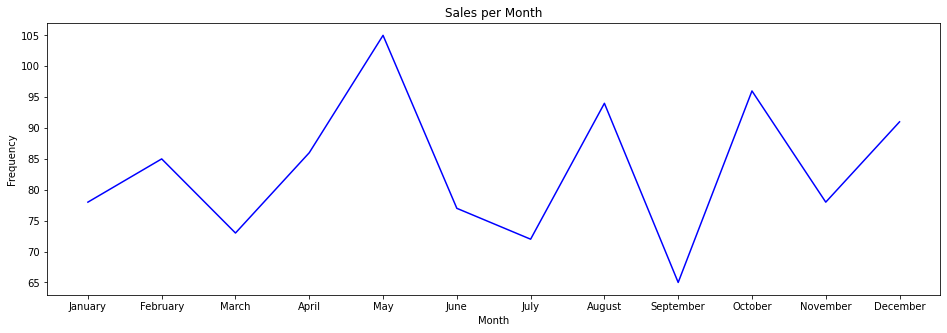

In [340]:
plt.figure(figsize=(16,5))


plt.plot(sorted_month_counts.index, sorted_month_counts.values, color = 'blue')
# Customize the plot
plt.ylabel('Frequency')
plt.xlabel('Month')
plt.title('Sales per Month')

plt.show()

**VISUALIZATION OF MONTHS WITH THEIR NUMBER OF SALES**

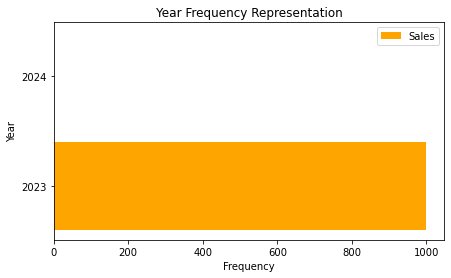

In [341]:
plt.figure(figsize=(7,4))
value_counts = year.value_counts()

plt.barh(value_counts.index, value_counts.values, label='Sales', color= 'orange')
# Customize the plot
plt.ylabel('Year')
plt.xlabel('Frequency')
plt.title('Year Frequency Representation')

plt.legend()
plt.show()

**VISUALIZATION OF YEARS WITH THE NUMBER OF SALES**

### CUSTOMER ID COLUMN  

In [342]:
data['customer_id'].nunique()

1000

**This represent the unique identity of customer that patronized the retail store. There are 1000 unique customers according to the data**

### GENDER COLUMN

In [343]:
data['gender'].head()

0      Male
1    Female
2      Male
3      Male
4      Male
Name: gender, dtype: category
Categories (2, object): ['Female', 'Male']

In [344]:
data['gender'].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

**There are two genders that partonize the store**
- **Male**
- **Female**

In [345]:
data['gender'].value_counts().to_frame()

,gender
Female,510
Male,490


**From the above table, Females patronize the retail store more with _510_ sales while Males have _490_ sales recorded**

<AxesSubplot:ylabel='gender'>

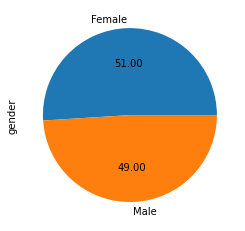

In [346]:
data['gender'].value_counts().plot(kind='pie',autopct='%.2f')


**By percentage, Females has 51% number of sales while Males have 49% number of sales**

### AGE COLUMN

In [347]:
data['age'].head()

0    34
1    26
2    50
3    37
4    30
Name: age, dtype: int64

**Creation of additional variables**

**_Since we are performing a sales analysis, it is advisable to divide the customer ages into different age groups. Additionally, I will create new variables related to dates: quarter, month and season._**

**Creation of age groups**
- **Young Adults: 18-29**
- **Early Adulthood: 30-39**
- **Middle Adulthood: 40-49**
- **Seniors: 50-64**

In [348]:
data['age_group'] = pd.cut(data.age, bins = [17,30,40,50,64],
                   labels= ['Young Adults', 'Early Adulthood', 'Middle Adulthood', 'Seniors'] )

In [349]:
data.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Early Adulthood
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Young Adults
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Middle Adulthood
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Early Adulthood
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Young Adults


**I Added a new column to the dataset "Age group"**

In [350]:
data['age'].describe()

count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: age, dtype: float64

**From the information, these are the insights derived**
- **The younger customer is 18 years old**
- **The oldest customer is 64 years old**
- **The average age of customer that patronized the store is 41 years**



**Creation of age groups**
- **Young Adults: 18-29**
- **Early Adulthood: 30-39**
- **Middle Adulthood: 40-49**
- **Seniors: 50-64**

In [351]:
data['age_group'].unique()

['Early Adulthood', 'Young Adults', 'Middle Adulthood', 'Seniors']
Categories (4, object): ['Young Adults' < 'Early Adulthood' < 'Middle Adulthood' < 'Seniors']

In [352]:
data['age_group'].value_counts().to_frame()

,age_group
Seniors,313
Young Adults,273
Middle Adulthood,221
Early Adulthood,193


**From the above table, The "Seniors" i.e age from 50-64 had more numbers of sales**  
**From the above table, The "Early Adulthood" i.e age from 30-39 had more numbers of sales**  


### PRODUCT CATEGORY COLUMN

In [353]:
data['product_category'].unique()

['Beauty', 'Clothing', 'Electronics']
Categories (3, object): ['Beauty', 'Clothing', 'Electronics']

**There are three (3) categories of products**
- **Beauty**
- **Clothing**
- **Electronics**

In [354]:
data['product_category'].value_counts().to_frame()

,product_category
Clothing,351
Electronics,342
Beauty,307


**Clothing products has the highest number of sales of 351 sales**

**Beauty products has the least number of sales of 307 sales**

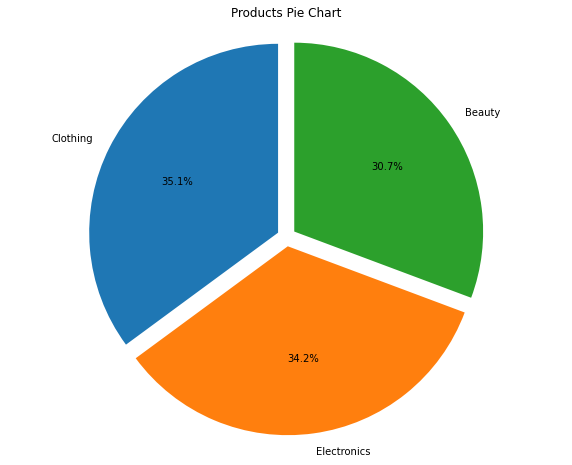

In [355]:
# Define the explode parameter (emphasize 'A' and 'B')
explode = (0.05, 0.05, .05)  # Explode the first and second categories

# Create the pie chart and set the figure size
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the width and height as needed
product =  data['product_category'].value_counts()

# Create the pie chart
ax.pie(product, labels=product.index, autopct='%1.1f%%', startangle=90, explode=explode)

# Set a title for the chart
ax.set_title('Products Pie Chart')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### QUANTITY COLUMN

In [356]:
data['quantity'].head()

0    3
1    2
2    1
3    1
4    2
Name: quantity, dtype: int64

In [357]:
data['quantity'].describe()

count    1000.000000
mean        2.514000
std         1.132734
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: quantity, dtype: float64

- **The maximum quantity of product sold is 4**
- **The minimum quanity of product sold is 1**
- **The average quanity of product sold is 2.5**

In [358]:
data['quantity'].sum()

2514

**The total quantity of Products sold is 2514**

### PRICE PER UNIT COLUMN 

In [359]:
data['price_per_unit'].sum()

179890

**The total sum of unit items sold is 179890**

In [360]:
data['price_per_unit'].describe()

count    1000.000000
mean      179.890000
std       189.681356
min        25.000000
25%        30.000000
50%        50.000000
75%       300.000000
max       500.000000
Name: price_per_unit, dtype: float64

- **The Maximum price of unit item sold is £500** (Most expensive unit item sold)
- **The minimum price of unit item sold is £25** (least expensive unit item sold)
- **The avarage price of unit item sold is £180**

### TOTAL AMOUNT COLUMN 

In [361]:
data['total_amount'].sum()

456000

**The total sum of total amount of all items sold is 456000**

In [362]:
data['total_amount'].describe()

count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: total_amount, dtype: float64

- **The Maximum total amount of items sold is £2000** 
- **The Minimum total amount of items sold is £25** 
- **The avarage total amount of items sold is £456**

In [363]:
data['month'] = month

In [364]:
data.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,age_group,month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Early Adulthood,November
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Young Adults,February
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Middle Adulthood,January
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Early Adulthood,May
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Young Adults,May


In [365]:
avg_total_sales_per_month = data.groupby('month').total_amount.mean().round(2)

In [366]:
avg_total_sales_per_month.to_frame()

,total_amount
month,
April,393.84
August,393.19
December,491.10
February,518.35
January,474.10
July,492.57
June,476.82
March,397.12
May,506.19


In [367]:
# Get the value counts
value_counts = avg_total_sales_per_month

# Define a custom sort order
custom_sort = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
               'October', 'November', 'December']

# Sort the value counts based on the custom order
avg_total_sales_per_month = value_counts.loc[custom_sort]

**The above table is the average total sales per month**

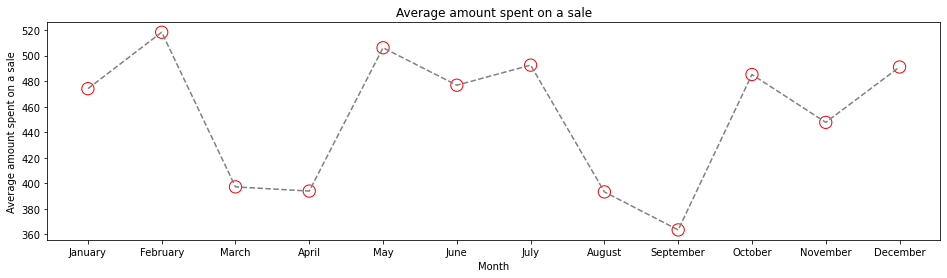

In [368]:
fig, ax = plt.subplots(figsize=(16,4))
plt.plot(avg_total_sales_per_month, ls='--', color='gray')
plt.scatter(avg_total_sales_per_month.index,
            avg_total_sales_per_month.values,
           edgecolor='red', color='none', s=150)
ax.set_xlabel('Month')
ax.set_ylabel('Average amount spent on a sale')
ax.set_title('Average amount spent on a sale')
#plt.xticks(rotation=45)
plt.show()

**What is the Average amount spent Per Gender?**

In [369]:
avg_spent_per_gender = data.groupby('gender').total_amount.mean().round(2)

In [370]:
avg_spent_per_gender.to_frame()

,total_amount
gender,
Female,456.55
Male,455.43


**According to data, Female have an average total sum of £456.55, while Male have an average total sum of £455.43**

**Female spent more than Male.**

<AxesSubplot:ylabel='total_amount'>

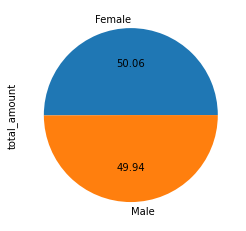

In [371]:
avg_spent_per_gender.plot(kind='pie',autopct='%.2f')

**What is the average spent by Age group?**

In [372]:
avg_spent_per_age_group = data.groupby('age_group').total_amount.mean().round(2)

In [373]:
avg_spent_per_age_group.to_frame()

,total_amount
age_group,
Young Adults,486.98
Early Adulthood,497.15
Middle Adulthood,424.41
Seniors,425.91



- **Young Adults: 18-29** 
- **Early Adulthood: 30-39**
- **Middle Adulthood: 40-49**
- **Seniors: 50-64**

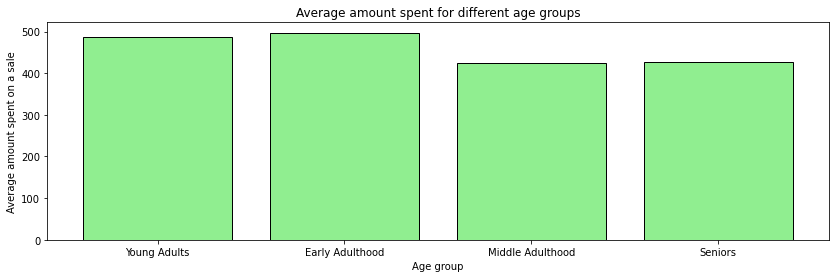

In [374]:
fig, ax = plt.subplots(figsize=(14,4))
plt.bar(x=avg_spent_per_age_group.index, height=avg_spent_per_age_group,
       color='lightgreen', edgecolor='black')
ax.set_xlabel('Age group')
ax.set_ylabel('Average amount spent on a sale')
ax.set_title('Average amount spent for different age groups')
#plt.xticks(rotation=45)
plt.show()

**Early Adulthood from Age 30 - 39, spent more on the Average**

In [375]:
avg_amount_per_product = data.groupby('product_category').total_amount.mean().round(2)

In [376]:
avg_amount_per_product.to_frame()

,total_amount
product_category,
Beauty,467.48
Clothing,443.25
Electronics,458.79


**On average, beauty products cost more**

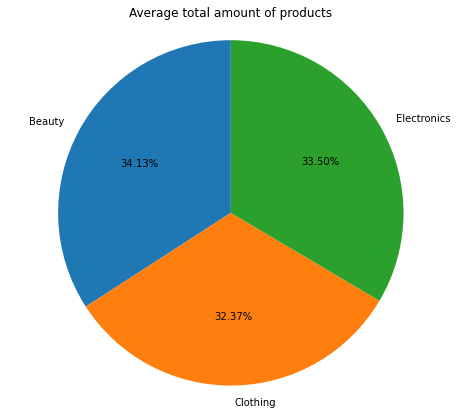

In [377]:
# Define the explode parameter (emphasize 'A' and 'B')

# Create the pie chart and set the figure size
fig, ax = plt.subplots(figsize=(8, 7))  # Adjust the width and height as needed


# Create the pie chart
ax.pie(avg_amount_per_product, labels=avg_amount_per_product.index, autopct='%1.2f%%', startangle=90)

# Set a title for the chart
ax.set_title('Average total amount of products')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()